In [1]:
import pandas as pd
import sklearn
pd.options.display.max_columns = 10000
experiments = []

In [28]:
dfall = pd.read_csv('portland_housing.csv.gz')
dfall

/tmp/ipykernel_11626/2049606831.py:1: DtypeWarning: Columns (20,50,161,200) have mixed types. Specify dtype option on import or set low_memory=False.
  dfall = pd.read_csv('portland_housing.csv.gz')


abbreviatedAddress address/city  address/zipcode  bathrooms  \
0      2860 NE Blossom Hill Rd     Fairview            97024        3.0   
1        20386 NE Mackenzie Ln     Fairview            97024        3.0   
2              1121 SW 10th Dr      Gresham            97080        3.0   
3           19309 NE Glisan St     Portland            97230        1.0   
4             25-65 NW 20th St      Gresham            97030        3.0   
...                        ...          ...              ...        ...   
25726         7600 SW Erica Pl    Beaverton            97008        2.0   
25727       7275 SW Palmer Way    Beaverton            97007        3.0   
25728    (Undisclosed Address)    Beaverton            97008        2.0   
25729         7250 SW 70th Ave     Portland            97223        2.0   
25730         6655 SW 67th Ave     Portland            97223        3.0   

       bedrooms                          brokerageName      dateSold  \
0           3.0                                    NaN  1.621560e+12   
1           3.0    Harcourts Real Estate Network Group  1.619140e+12   
2           4.0               ERA Freeman & Associates  1.622760e+12   
3           3.0           Premiere Property Group, LLC  1.622760e+12   
4           6.0                                    NaN  1.622510e+12   
...         ...                                    ...           ...   
25726       3.0  Keller Williams Realty Portland Elite  1.595290e+12   
25727       4.0   Keller Williams Realty Professionals  1.595200e+12   
25728       2.0                 Opendoor Brokerage LLC  1.622760e+12   
25729       3.0                                    NaN  1.599000e+12   
25730       4.0                 iPropertiesNW.com, LLC  1.598310e+12   

       daysOnZillow                                        description  \
0              25.0  2860 NE Blossom Hill Rd, Fairview, OR 97024 is...   
1              53.0  Cute as a button 3bed/2.5bath home with brand ...   
2              11.0  What a wonderful large home at end of quiet cu...   
3              11.0                                                NaN   
4              14.0  25-65 NW 20th St, Gresham, OR 97030 is a apart...   
...             ...                                                ...   
25726         363.0  Perfectly nestled back from the Cul-de-sac roa...   
25727         364.0  Contemporary Dream Home Backing To Lowami Hart...   
25728          45.0  This Beaverton two-story cul-de-sac home offer...   
25729         320.0  Close-in yet feels like the country. Large lot...   
25730         328.0  Gorgeous lot backs to Hideaway Park and is ove...   

       favoriteCount     homeStatus       homeType  lastSoldPrice   latitude  \
0                NaN  RECENTLY_SOLD      TOWNHOUSE         315400  45.543571   
1                NaN  RECENTLY_SOLD  SINGLE_FAMILY         400000  45.547585   
2                NaN  RECENTLY_SOLD  SINGLE_FAMILY         512000  45.488228   
3                1.0  RECENTLY_SOLD  SINGLE_FAMILY         348000  45.526634   
4                NaN  RECENTLY_SOLD      APARTMENT         510000  45.511238   
...              ...            ...            ...            ...        ...   
25726            NaN  RECENTLY_SOLD  SINGLE_FAMILY         415000  45.465111   
25727            1.0  RECENTLY_SOLD  SINGLE_FAMILY         615000  45.467197   
25728            NaN  RECENTLY_SOLD      TOWNHOUSE         380000        NaN   
25729            NaN  RECENTLY_SOLD  SINGLE_FAMILY          57997  45.467545   
25730            NaN  RECENTLY_SOLD  SINGLE_FAMILY         585000  45.471767   

       livingArea   longitude  lotSize  pageViewCount postingContact/name  \
0          1806.0 -122.441765   1555.0           47.0                 NaN   
1          1518.0 -122.453224   3484.0            4.0        Julie Murray   
2          2724.0 -122.444420   9583.0          153.0      Michelle Haage   
3          1217.0 -122.464088  13939.0           32.0       Greg Whistler   
4          

In [ ]:
numsamples = 10000
df = dfall.sample(numsamples)
sample_rownums = df.index.values
df

abbreviatedAddress address/city  address/zipcode  bathrooms  bedrooms  \
10577     5741 SE 71st Ave     Portland            97206        1.0       3.0   
19636     610 Stonehill St    Gladstone            97027        2.0       3.0   
19619     10477 SE 53rd Pl     Portland            97222        3.0       3.0   
11190   9916 SE Reedway St     Portland            97266        1.0       3.0   
20652   17375 SW 128th Ave       Tigard            97224        3.0       4.0   
...                    ...          ...              ...        ...       ...   
25717  7227 SW Linette Way    Beaverton            97007        2.0       3.0   
4935       4304 SW 36th Pl     Portland            97221        3.0       5.0   
15943   3022 Kensington Ct    West Linn            97068        2.5       3.0   
16520  3423 Lake Grove Ave  Lake Oswego            97035        4.0       4.0   
10971   5036 SE Bybee Blvd     Portland            97206        1.0       2.0   

                  brokerageName      dateSold  daysOnZillow  \
10577                       NaN  1.608770e+12         216.0   
19636                       NaN  1.615940e+12         131.0   
19619          Maple Realty Inc  1.605480e+12         252.0   
11190       RE/MAX Equity Group  1.597970e+12         341.0   
20652  Knipe Realty ERA Powered  1.594770e+12         331.0   
...                         ...           ...           ...   
25717    Living PDX Real Estate  1.597360e+12         339.0   
4935    Windermere Realty Trust  1.602720e+12         281.0   
15943                       NaN  1.626310e+12          11.0   
16520      Totem Properties LLC  1.622760e+12          52.0   
10971      Coldwell Banker Bain  1.596070e+12         363.0   

                                             description  favoriteCount  \
10577  5741 SE 71st Ave, Portland, OR 97206 is a sing...            0.0   
19636  Please no listing agents calling asking to lis...            0.0   
19619  Gorgeous Ranch Home in Culdesac! Completely Re...            0.0   
11190  Charming,one level bungalow w/ updates galore ...            NaN   
20652  Tranquil home in desirable neighbrhd conv to s...            NaN   
...                                                  ...            ...   
25717  One level, turn key has it all. 3 bed, 2 bath ...            NaN   
4935   Private oasis in coveted Bridlemile sited abov...            NaN   
15943  Umpqua Heights resale. Built in 2001 by Renais...            0.0   
16520  Warm and spacious custom home in desirable Lak...            0.0   
10971  Wonderful Brentwood-Darlington Location. This ...            0.0   

          homeStatus       homeType  lastSoldPrice   latitude  livingArea  \
10577  RECENTLY_SOLD  SINGLE_FAMILY         315000  45.481049      1674.0   
19636  RECENTLY_SOLD  SINGLE_FAMILY         400000  45.390759      1502.0   
19619  RECENTLY_SOLD  SINGLE_FAMILY         450000  45.447380      1889.0   
11190  RECENTLY_SOLD  SINGLE_FAMILY         342000  45.481030       912.0   
20652  RECENTLY_SOLD  SINGLE_FAMILY         489900  45.394241      2071.0   
...              ...            ...            ...        ...         ...   
25717  RECENTLY_SOLD  SINGLE_FAMILY         360000  45.467419      1008.0   
4935   RECENTLY_SOLD  SINGLE_FAMILY         910000  45.491772      3464.0   
15943  RECENTLY_SOLD  SINGLE_FAMILY         760800  45.355988      2317.0   
16520  RECENTLY_SOLD  SINGLE_FAMILY        1650000  45.411243      4721.0   
10971  RECENTLY_SOLD  SINGLE_FAMILY         235000  45.472374       604.0   

        longitude  lotSize  pageViewCount        postingContact/name    price  \
10577 -122.590599   4275.0            8.0                        NaN   315000   
19636 -122.591888   6300.0            9.0                        NaN   400000   
19619 -122.608215   9583.0            2.0                 Diane Ciot   450000   
11190 -122.561264   4791.0            NaN               Tracy Brophy   342000   
20652 -122.809364   5662.0            NaN      

In [29]:
df = dfall
df.columns = [c.replace('address/', '') for c in df.columns]
df.columns = [c.replace('resoFacts/', '') for c in df.columns]
df.columns = [c.replace('schools/', '') for c in df.columns]

In [4]:
df.describe()

zipcode     bathrooms      bedrooms      dateSold  daysOnZillow  \
count  25731.000000  25247.000000  24961.000000  2.573100e+04  25725.000000   
mean   97143.830943      2.561896      3.356356  1.610792e+12    184.738620   
std      567.759775      1.009135      1.001626  9.972007e+09    113.431466   
min     7123.000000      0.000000      0.000000  1.591920e+12      1.000000   
25%    97062.000000      2.000000      3.000000  1.601600e+12     77.000000   
50%    97203.000000      3.000000      3.000000  1.610670e+12    185.000000   
75%    97221.000000      3.000000      4.000000  1.620170e+12    292.000000   
max    97267.000000     23.000000     43.000000  1.626390e+12    422.000000   

       favoriteCount  lastSoldPrice      latitude    livingArea     longitude  \
count    9823.000000   2.573100e+04  25718.000000  25266.000000  25718.000000   
mean        1.436628   5.849993e+05     45.478251   2179.079237   -122.686321   
std        11.370629   4.509202e+05      0.065477   1129.151916      0.144860   
min         0.000000   3.000000e+02     45.258659      0.000000   -123.074242   
25%         0.000000   3.900000e+05     45.433972   1460.000000   -122.806112   
50%         0.000000   5.220000e+05     45.488914   1996.000000   -122.674080   
75%         0.000000   6.620000e+05     45.526379   2670.000000   -122.592539   
max       295.000000   4.100000e+07     45.713860  51290.000000   -122.280975   

            lotSize  pageViewCount         price  priceHistory/0/price  \
count  2.284100e+04   14464.000000  2.573100e+04          2.573100e+04   
mean   2.740146e+04      47.875346  5.851917e+05          5.783239e+05   
std    1.391282e+06     312.693012  4.518907e+05          4.560361e+05   
min    0.000000e+00       0.000000  3.000000e+02          3.000000e+02   
25%    4.791000e+03       5.000000  3.910000e+05          3.850000e+05   
50%    6.969000e+03      10.000000  5.220000e+05          5.200000e+05   
75%    1.001800e+04      23.000000  6.622000e+05          6.600000e+05   
max    2.087221e+08   15595.000000  4.100000e+07          4.100000e+07   

       priceHistory/0/priceChangeRate  priceHistory/0/pricePerSquareFoot  \
count                    25731.000000                       25217.000000   
mean                         0.273553                         276.931316   
std                          9.220869                         151.301150   
min                         -0.996575                           0.000000   
25%                          0.000000                         223.000000   
50%                          0.013026                         262.000000   
75%                          0.073430                         316.000000   
max                        999.000000                       16558.000000   

       priceHistory/0/time  priceHistory/1/price  \
count         2.573100e+04          2.431200e+04   
mean          1.610934e+12          5.443480e+05   
std           9.989788e+09          3.490061e+05   
min           1.593910e+12          3.000000e+02   
25%           1.601860e+12          3.645000e+05   
50%           1.611190e+12          4.949000e+05   
75%           1.620350e+12          6.390000e+05   
max           1.626570e+12          8.250000e+06   

       priceHistory/1/priceChangeRate  priceHistory/1/pricePerSquareFoot  \
count                    24322.000000                       23974.000000   
mean                         0.078691                         259.173396   
std                          6.935120                          96.133953   
min                         -0.997878                           0.000000   
25%                          0.000000                         212.000000   
50%                          0.000000                         251.000000   
75%                          0.000000                         299.000000   
max                       1075.523702                        4500.000000   

       priceHistory/1/time  priceHistory/2/price  \
count       

In [10]:
df.describe(include='all')

abbreviatedAddress      city       zipcode     bathrooms  \
count                   25731     25731  25731.000000  25247.000000   
unique                  25681        36           NaN           NaN   
top     (Undisclosed Address)  Portland           NaN           NaN   
freq                       13     11996           NaN           NaN   
mean                      NaN       NaN  97143.830943      2.561896   
std                       NaN       NaN    567.759775      1.009135   
min                       NaN       NaN   7123.000000      0.000000   
25%                       NaN       NaN  97062.000000      2.000000   
50%                       NaN       NaN  97203.000000      3.000000   
75%                       NaN       NaN  97221.000000      3.000000   
max                       NaN       NaN  97267.000000     23.000000   

            bedrooms                 brokerageName      dateSold  \
count   24961.000000                         21362  2.573100e+04   
unique           NaN                           785           NaN   
top              NaN  Premiere Property Group, LLC           NaN   
freq             NaN                          1539           NaN   
mean        3.356356                           NaN  1.610792e+12   
std         1.001626                           NaN  9.972007e+09   
min         0.000000                           NaN  1.591920e+12   
25%         3.000000                           NaN  1.601600e+12   
50%         3.000000                           NaN  1.610670e+12   
75%         4.000000                           NaN  1.620170e+12   
max        43.000000                           NaN  1.626390e+12   

        daysOnZillow                                        description  \
count   25725.000000                                              25613   
unique           NaN                                              25303   
top              NaN  Open great room with gas fireplace Covered por...   
freq             NaN                                                  9   
mean      184.738620                                                NaN   
std       113.431466                                                NaN   
min         1.000000                                                NaN   
25%        77.000000                                                NaN   
50%       185.000000                                                NaN   
75%       292.000000                                                NaN   
max       422.000000                                                NaN   

        favoriteCount     homeStatus       homeType  lastSoldPrice  \
count     9823.000000          25731          25731   2.573100e+04   
unique            NaN              5              5            NaN   
top               NaN  RECENTLY_SOLD  SINGLE_FAMILY            NaN   
freq              NaN          25616          22395            NaN   
mean         1.436628            NaN            NaN   5.849993e+05   
std         11.370629            NaN            NaN   4.509202e+05   
min          0.000000            NaN            NaN   3.000000e+02   
25%          0.000000            NaN            NaN   3.900000e+05   
50%          0.000000            NaN            NaN   5.220000e+05   
75%          0.000000            NaN            NaN   6.620000e+05   
max        295.000000            NaN            NaN   4.100000e+07   

            latitude    livingArea     longitude       lotSize  pageViewCount  \
count   25718.000000  25266.000000  25718.000000  2.284100e+04   14464.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean       45.478251   2179.079237   -122.686321  2.740146e+04      47.875346   
std         0.065477   1129.151916      0.144860  1.391282e+06     312.693012   
min        45.258659      0.0000

In [30]:
target_cols = [c for c in df.columns if 'price' in c.lower()]
df[target_cols]

lastSoldPrice   price priceHistory/0/attributeSource/infoString1  \
0             315400  315400                                        NaN   
1             400000  400000                                 21608411.0   
2             512000  512000                                 21556588.0   
3             348000  348000                                 21339669.0   
4             510000  510000                                        NaN   
...              ...     ...                                        ...   
25726         415000  415000                                 20675531.0   
25727         615000  615000                                 20122727.0   
25728         380000  380000                                 21049292.0   
25729          57997   57997                                        NaN   
25730         585000  585000                                 20419179.0   

      priceHistory/0/attributeSource/infoString2  \
0                                  Public Record   
1                                      RMLS (OR)   
2                                      RMLS (OR)   
3                                      RMLS (OR)   
4                                  Public Record   
...                                          ...   
25726                                  RMLS (OR)   
25727                                  RMLS (OR)   
25728                                  RMLS (OR)   
25729                              Public Record   
25730                                  RMLS (OR)   

              priceHistory/0/attributeSource/infoString3  \
0                                                    NaN   
1      https://photos.zillowstatic.com/fp/ca2b2c15d6e...   
2      https://photos.zillowstatic.com/fp/ca2b2c15d6e...   
3      https://photos.zillowstatic.com/fp/ca2b2c15d6e...   
4                                                    NaN   
...                                                  ...   
25726  https://photos.zillowstatic.com/fp/ca2b2c15d6e...   
25727  https://photos.zillowstatic.com/fp/ca2b2c15d6e...   
25728  https://photos.zillowstatic.com/fp/ca2b2c15d6e...   
25729                                                NaN   
25730  https://photos.zillowstatic.com/fp/ca2b2c15d6e...   

      priceHistory/0/buyerAgent/name  \
0                                NaN   
1                       David Girard   
2                                NaN   
3                                NaN   
4                                NaN   
...                              ...   
25726                            NaN   
25727                   Marcia Walsh   
25728                            NaN   
25729                            NaN   
25730                            NaN   

                     priceHistory/0/buyerAgent/photo/url  \
0                                                    NaN   
1      https://photos.zillowstatic.com/h_e/ISvkz56dm7...   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
25726                                                NaN   
25727  https://photos.zillowstatic.com/h_e/ISlyoc8r6j...   
25728                                                NaN   
25729                                                NaN   
25730                                                NaN   

      priceHistory/0/buyerAgent/profileUrl priceHistory/0/date  \
0                                      NaN           5/21/2021   
1              /profile/Portland-Realtor1/           4/23/2021   
2                                      NaN            6/4/2021   
3                                      NaN            6/4/2021   
4                                      NaN            6/1/2021   
...                                    ...                 ...   
25726                                  NaN           7/21/2020   
25727              /profile/Ma

In [31]:
feature_cols = [c for c in df.columns if 'price' not in c.lower() and '/' not in c]
feature_cols

['abbreviatedAddress',
 'city',
 'zipcode',
 'bathrooms',
 'bedrooms',
 'brokerageName',
 'dateSold',
 'daysOnZillow',
 'description',
 'favoriteCount',
 'homeStatus',
 'homeType',
 'latitude',
 'livingArea',
 'longitude',
 'lotSize',
 'pageViewCount',
 'propertyTaxRate',
 'rentZestimate',
 'rentalApplicationsAcceptedType',
 'architecturalStyle',
 'associationFee',
 'basement',
 'fencing',
 'fireplaces',
 'furnished',
 'hasAdditionalParcels',
 'hasAssociation',
 'hasAttachedGarage',
 'hasAttachedProperty',
 'hasCarport',
 'hasCooling',
 'hasFireplace',
 'hasGarage',
 'hasHeating',
 'hasHomeWarranty',
 'hasLandLease',
 'hasOpenParking',
 'hasPetsAllowed',
 'hasSpa',
 'hasView',
 'homeType',
 'isNewConstruction',
 'onMarketDate',
 'parcelNumber',
 'parking',
 'propertyCondition',
 'roofType',
 'stories',
 'subdivisionName',
 'waterViewYN',
 'restimateHighPercent',
 'restimateLowPercent',
 'taxAssessedValue',
 'taxAssessedYear',
 'url',
 'yearBuilt',
 'zestimate',
 'zestimateHighPercent',

In [32]:
numerical_colnames = df.describe().columns
numerical_colnames

Index(['zipcode', 'bathrooms', 'bedrooms', 'dateSold', 'daysOnZillow',
       'favoriteCount', 'lastSoldPrice', 'latitude', 'livingArea', 'longitude',
       ...
       'taxHistory/0/taxIncreaseRate', 'taxHistory/0/taxPaid',
       'taxHistory/0/time', 'taxHistory/0/value',
       'taxHistory/0/valueIncreaseRate', 'yearBuilt', 'zestimate',
       'zestimateHighPercent', 'zestimateLowPercent', 'zpid'],
      dtype='object', length=117)

## Find target variable(s)
Need to remove the "cheating variables" like the tax assessor's estimate of the home price.
And any price history for the home.
You want your model to be able to predict home price just based on things like number of bedrooms and the size of the lot.

In [33]:
target_colnames = [c for c in numerical_colnames if 'price' in c.lower() or 'tax' in c.lower()]
target_colnames

['lastSoldPrice',
 'price',
 'priceHistory/0/price',
 'priceHistory/0/priceChangeRate',
 'priceHistory/0/pricePerSquareFoot',
 'priceHistory/0/time',
 'priceHistory/1/price',
 'priceHistory/1/priceChangeRate',
 'priceHistory/1/pricePerSquareFoot',
 'priceHistory/1/time',
 'priceHistory/2/price',
 'priceHistory/2/priceChangeRate',
 'priceHistory/2/pricePerSquareFoot',
 'priceHistory/2/time',
 'priceHistory/3/price',
 'priceHistory/3/priceChangeRate',
 'priceHistory/3/pricePerSquareFoot',
 'priceHistory/3/time',
 'priceHistory/4/price',
 'priceHistory/4/priceChangeRate',
 'priceHistory/4/pricePerSquareFoot',
 'priceHistory/4/time',
 'priceHistory/5/price',
 'priceHistory/5/priceChangeRate',
 'priceHistory/5/pricePerSquareFoot',
 'priceHistory/5/time',
 'priceHistory/6/price',
 'priceHistory/6/priceChangeRate',
 'priceHistory/6/pricePerSquareFoot',
 'priceHistory/6/time',
 'priceHistory/7/price',
 'priceHistory/7/priceChangeRate',
 'priceHistory/7/pricePerSquareFoot',
 'priceHistory/7/tim

In [34]:
target = 'price'

In [35]:
feature_colnames = [c for c in numerical_colnames if c not in target_colnames and '/' not in c and 'tax' not in c]
feature_colnames

['zipcode',
 'bathrooms',
 'bedrooms',
 'dateSold',
 'daysOnZillow',
 'favoriteCount',
 'latitude',
 'livingArea',
 'longitude',
 'lotSize',
 'pageViewCount',
 'rentZestimate',
 'fireplaces',
 'onMarketDate',
 'parking',
 'stories',
 'restimateHighPercent',
 'restimateLowPercent',
 'yearBuilt',
 'zestimate',
 'zestimateHighPercent',
 'zestimateLowPercent',
 'zpid']

In [36]:
feature_colnames = ['bathrooms', 'bedrooms', 'latitude', 'longitude', 'lotSize', 'fireplaces', 'stories']
feature_colnames


['bathrooms',
 'bedrooms',
 'latitude',
 'longitude',
 'lotSize',
 'fireplaces',
 'stories']

In [37]:
target = 'price'
print('Make sure the target column name is not part of any of the feature column names')
any(target in c for c in feature_colnames)

Make sure the target column name is not part of any of the feature column names


False

## First experiment
First experiment will fill the NaNs with mean()

In [38]:
numnans = df[feature_colnames].isna().sum()
numnans

bathrooms      484
bedrooms       770
latitude        13
longitude       13
lotSize       2890
fireplaces    8578
stories       4525
dtype: int64

In [39]:
df = df[feature_colnames + [target]]
df.head()


bathrooms  bedrooms   latitude   longitude  lotSize  fireplaces  stories  \
0        3.0       3.0  45.543571 -122.441765   1555.0         NaN      NaN   
1        3.0       3.0  45.547585 -122.453224   3484.0         NaN      2.0   
2        3.0       4.0  45.488228 -122.444420   9583.0         1.0      2.0   
3        1.0       3.0  45.526634 -122.464088  13939.0         1.0      1.0   
4        3.0       6.0  45.511238 -122.431534   8545.0         NaN      NaN   

    price  
0  315400  
1  400000  
2  512000  
3  348000  
4  510000

In [41]:
df['fireplaces_isna'] = df['fireplaces'].isna().copy()
feature_colnames += ['fireplaces_isna']
df['fireplaces'].fillna(0, inplace=True)
df.head()

/tmp/ipykernel_11626/4256973026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fireplaces_isna'] = df['fireplaces'].isna().copy()
/tmp/ipykernel_11626/4256973026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fireplaces'].fillna(0, inplace=True)


bathrooms  bedrooms   latitude   longitude  lotSize  fireplaces  stories  \
0        3.0       3.0  45.543571 -122.441765   1555.0         0.0      0.0   
1        3.0       3.0  45.547585 -122.453224   3484.0         0.0      2.0   
2        3.0       4.0  45.488228 -122.444420   9583.0         1.0      2.0   
3        1.0       3.0  45.526634 -122.464088  13939.0         1.0      1.0   
4        3.0       6.0  45.511238 -122.431534   8545.0         0.0      0.0   

    price  stories_isna  fireplaces_isna  
0  315400          True             True  
1  400000         False             True  
2  512000         False            False  
3  348000         False            False  
4  510000          True             True

In [40]:
df['stories_isna'] = df['stories'].isna().copy()
feature_colnames += ['stories_isna']
df['stories'].fillna(0, inplace=True)
df.head()

/tmp/ipykernel_11626/2010154490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stories_isna'] = df['stories'].isna().copy()
/tmp/ipykernel_11626/2010154490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stories'].fillna(0, inplace=True)


bathrooms  bedrooms   latitude   longitude  lotSize  fireplaces  stories  \
0        3.0       3.0  45.543571 -122.441765   1555.0         NaN      0.0   
1        3.0       3.0  45.547585 -122.453224   3484.0         NaN      2.0   
2        3.0       4.0  45.488228 -122.444420   9583.0         1.0      2.0   
3        1.0       3.0  45.526634 -122.464088  13939.0         1.0      1.0   
4        3.0       6.0  45.511238 -122.431534   8545.0         NaN      0.0   

    price  stories_isna  
0  315400          True  
1  400000         False  
2  512000         False  
3  348000         False  
4  510000          True

In [42]:
df_features = df[feature_colnames].copy()
for c in feature_colnames:
    df_features[c] = df_features[c].fillna(df_features[c].mean())
df_features

bathrooms  bedrooms   latitude   longitude  lotSize  fireplaces  \
0            3.0       3.0  45.543571 -122.441765   1555.0         0.0   
1            3.0       3.0  45.547585 -122.453224   3484.0         0.0   
2            3.0       4.0  45.488228 -122.444420   9583.0         1.0   
3            1.0       3.0  45.526634 -122.464088  13939.0         1.0   
4            3.0       6.0  45.511238 -122.431534   8545.0         0.0   
...          ...       ...        ...         ...      ...         ...   
25726        2.0       3.0  45.465111 -122.808701  10018.0         1.0   
25727        3.0       4.0  45.467197 -122.829628   9583.0         2.0   
25728        2.0       2.0  45.478251 -122.686321   1742.0         1.0   
25729        2.0       3.0  45.467545 -122.748367  17859.0         0.0   
25730        3.0       4.0  45.471767 -122.746880  15681.0         2.0   

       stories  stories_isna  fireplaces_isna  
0          0.0          True             True  
1          2.0         False             True  
2          2.0         False            False  
3          1.0         False            False  
4          0.0          True             True  
...        ...           ...              ...  
25726      1.0         False            False  
25727      3.0         False            False  
25728      2.0         False            False  
25729      0.0          True             True  
25730      2.0         False            False  

[25731 rows x 9 columns]

In [43]:
from sklearn.linear_model import LinearRegression
import numpy as np
LinearRegression

sklearn.linear_model._base.LinearRegression

In [44]:
X = df_features
y = df[target]  # target = 'price'

model = LinearRegression()
model.fit(X=X, y=y)

y_pred = model.predict(X)
e = y_pred - y
rmse = np.sqrt(np.mean(e**2))

experiments.append(dict(
    fillna='mean',
    model=model.__class__.__name__,
    numfeats=len(X.columns),
    rmse=rmse,
    ))
pd.DataFrame(experiments).round()

fillna             model  numfeats      rmse
0   mean  LinearRegression         9  406955.0

In [53]:
X

bathrooms  bedrooms   latitude   longitude  lotSize  fireplaces  \
0            3.0       3.0  45.543571 -122.441765   1555.0         0.0   
1            3.0       3.0  45.547585 -122.453224   3484.0         0.0   
2            3.0       4.0  45.488228 -122.444420   9583.0         1.0   
3            1.0       3.0  45.526634 -122.464088  13939.0         1.0   
4            3.0       6.0  45.511238 -122.431534   8545.0         0.0   
...          ...       ...        ...         ...      ...         ...   
25726        2.0       3.0  45.465111 -122.808701  10018.0         1.0   
25727        3.0       4.0  45.467197 -122.829628   9583.0         2.0   
25728        2.0       2.0  45.478251 -122.686321   1742.0         1.0   
25729        2.0       3.0  45.467545 -122.748367  17859.0         0.0   
25730        3.0       4.0  45.471767 -122.746880  15681.0         2.0   

       stories  stories_isna  fireplaces_isna  
0          0.0          True             True  
1          2.0         False             True  
2          2.0         False            False  
3          1.0         False            False  
4          0.0          True             True  
...        ...           ...              ...  
25726      1.0         False            False  
25727      3.0         False            False  
25728      2.0         False            False  
25729      0.0          True             True  
25730      2.0         False            False  

[25731 rows x 9 columns]

<Axes: xlabel='lotSize', ylabel='price'>

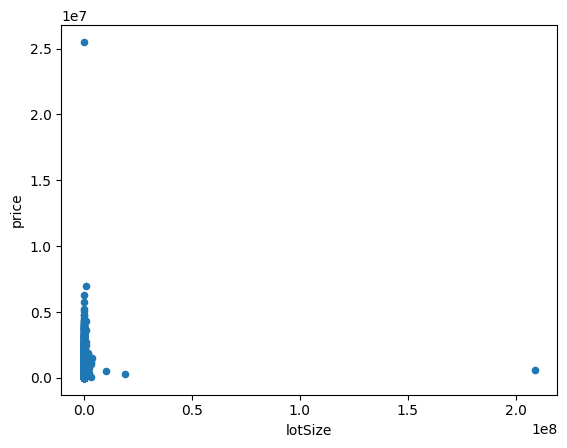

In [54]:
dfall.plot(kind='scatter', x='lotSize', y='price')


In [62]:
from matplotlib import pyplot as plt
x_name = 'longitude'
plt.scatter(x=X[x_name], y=y)
plt.grid('on')
plt.ylim(10_000, 500_000)
plt.xlim(X[x_name].min()+.05,X[x_name].max()-.05)
plt.xlabel(x_name.title())
plt.ylabel('Price ($)')


Text(0, 0.5, 'Price ($)')

In [64]:
X[['latitude', 'longitude']].mean()

latitude      45.478251
longitude   -122.686321
dtype: float64

In [68]:
X['distance_to_center'] = ((X[['latitude', 'longitude']] - X[['latitude', 'longitude']].mean())**2).sum(axis=1)**.5
X.head()

bathrooms  bedrooms   latitude   longitude  lotSize  fireplaces  stories  \
0        3.0       3.0  45.543571 -122.441765   1555.0         0.0      0.0   
1        3.0       3.0  45.547585 -122.453224   3484.0         0.0      2.0   
2        3.0       4.0  45.488228 -122.444420   9583.0         1.0      2.0   
3        1.0       3.0  45.526634 -122.464088  13939.0         1.0      1.0   
4        3.0       6.0  45.511238 -122.431534   8545.0         0.0      0.0   

   stories_isna  fireplaces_isna  distance_to_center  
0          True             True            0.253130  
1         False             True            0.243190  
2         False            False            0.242107  
3         False            False            0.227439  
4          True             True            0.256914

In [69]:
model = LinearRegression()
model.fit(X=X, y=y)

y_pred = model.predict(X)
e = y_pred - y
rmse = np.sqrt(np.mean(e**2))

experiments.append(dict(
    fillna='mean',
    model=model.__class__.__name__,
    numfeats=len(X.columns),
    rmse=rmse,
    ))
pd.DataFrame(experiments).round()

fillna             model  numfeats      rmse
0   mean  LinearRegression         9  406955.0
1   mean  LinearRegression        10  398600.0

In [46]:
x = X.loc[0]
x

bathrooms                 3.0
bedrooms                  3.0
latitude            45.543571
longitude         -122.441765
lotSize                1555.0
fireplaces                0.0
stories                   0.0
stories_isna             True
fireplaces_isna          True
Name: 0, dtype: object

In [48]:
model.predict([x])


/home/hobs/code/tangibleai/team/.venv/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([581034.9412839183], dtype=object)

In [49]:
y[0]

315400

In [50]:
cities = dfall['city']
cities

0         Fairview
1         Fairview
2          Gresham
3         Portland
4          Gresham
           ...    
25726    Beaverton
25727    Beaverton
25728    Beaverton
25729     Portland
25730     Portland
Name: city, Length: 25731, dtype: object

In [52]:
dfall.getdummies(['city'])

AttributeError: 'DataFrame' object has no attribute 'getdummies'

## Experiment 2
Let's see if recording the existence of NaNs before filling can improve the model's accuracy

In [ ]:
numnans = df[feature_colnames].isna().sum()
isna_featnames = [c for c, v in zip(numnans.index, numnans) if v > 0]
isna_featnames

['bathrooms',
 'bedrooms',
 'daysOnZillow',
 'favoriteCount',
 'latitude',
 'livingArea',
 'longitude',
 'lotSize',
 'pageViewCount',
 'rentZestimate',
 'fireplaces',
 'onMarketDate',
 'rooms/0/roomArea',
 'rooms/0/roomLength',
 'rooms/0/roomWidth',
 'rooms/1/roomArea',
 'rooms/1/roomLength',
 'rooms/1/roomWidth',
 'rooms/2/roomArea',
 'rooms/2/roomLength',
 'rooms/2/roomWidth',
 'rooms/3/roomArea',
 'rooms/3/roomLength',
 'rooms/3/roomWidth',
 'rooms/4/roomArea',
 'rooms/4/roomLength',
 'rooms/4/roomWidth',
 'rooms/5/roomArea',
 'rooms/5/roomLength',
 'rooms/5/roomWidth',
 'rooms/6/roomArea',
 'rooms/6/roomLength',
 'rooms/6/roomWidth',
 'stories',
 'restimateHighPercent',
 'restimateLowPercent',
 '0/distance',
 '0/rating',
 '0/size',
 '0/studentsPerTeacher',
 '0/totalCount',
 '1/distance',
 '1/rating',
 '1/size',
 '1/studentsPerTeacher',
 '1/totalCount',
 '2/distance',
 '2/rating',
 '2/size',
 '2/studentsPerTeacher',
 '2/totalCount',
 'solarPotential/buildFactor',
 'solarPotential/cl

In [ ]:
df_feature_isna = df[isna_featnames].isna().astype(int)
df_feature_isna.columns = [c + '_isna' for c in df_feature_isna.columns]
df_feature_isna

bathrooms_isna  bedrooms_isna  daysOnZillow_isna  favoriteCount_isna  \
10577               0              0                  0                   0   
19636               0              0                  0                   0   
19619               0              0                  0                   0   
11190               0              0                  0                   1   
20652               0              0                  0                   1   
...               ...            ...                ...                 ...   
25717               0              0                  0                   1   
4935                0              0                  0                   1   
15943               0              0                  0                   0   
16520               0              0                  0                   0   
10971               0              0                  0                   0   

       latitude_isna  livingArea_isna  longitude_isna  lotSize_isna  \
10577              0                0               0             0   
19636              0                0               0             0   
19619              0                0               0             0   
11190              0                0               0             0   
20652              0                0               0             0   
...              ...              ...             ...           ...   
25717              0                0               0             0   
4935               0                0               0             0   
15943              0                0               0             0   
16520              0                0               0             0   
10971              0                0               0             0   

       pageViewCount_isna  rentZestimate_isna  fireplaces_isna  \
10577                   0                   0                1   
19636                   0                   0                1   
19619                   0                   0                0   
11190                   1                   0                0   
20652                   1                   0                0   
...                   ...                 ...              ...   
25717                   1                   0                0   
4935                    1                   0                0   
15943                   0                   0                1   
16520                   0                   0                0   
10971                   0                   0                0   

       onMarketDate_isna  rooms/0/roomArea_isna  rooms/0/roomLength_isna  \
10577                  1                      1                        1   
19636                  1                      1                        1   
19619                  0                      1                        1   
11190                  0                      0                        0   
20652                  0                      0                        0   
...                  ...                    ...                      ...   
25717                  0                      1                        1   
4935                   0                      0                        0   
15943                  1                      1                        1   
16520                  0                      0                        0   
10971                  0                      1                        1   

       rooms/0/roomWidth_isna  rooms/1/roomArea_isna  rooms/1/roomLength_isna  \
10577                       1                      1                        1   
19636                       1                      1                        1   
19619                       1                      1                        1   
11190                       0                      0                        0   
20652                       0                      0                        0   
...          

## fillna(mean)
We already filled with means for the first experiment. So we can concatenate the original df_features DataFrame with the new isna DataFrame.

In [ ]:
df_features = pd.concat([df_features, df_feature_isna], axis=1)
df_features

zipcode  bathrooms  bedrooms      dateSold  daysOnZillow  \
10577    97206        1.0       3.0  1.608770e+12         216.0   
19636    97027        2.0       3.0  1.615940e+12         131.0   
19619    97222        3.0       3.0  1.605480e+12         252.0   
11190    97266        1.0       3.0  1.597970e+12         341.0   
20652    97224        3.0       4.0  1.594770e+12         331.0   
...        ...        ...       ...           ...           ...   
25717    97007        2.0       3.0  1.597360e+12         339.0   
4935     97221        3.0       5.0  1.602720e+12         281.0   
15943    97068        2.5       3.0  1.626310e+12          11.0   
16520    97035        4.0       4.0  1.622760e+12          52.0   
10971    97206        1.0       2.0  1.596070e+12         363.0   

       favoriteCount   latitude  livingArea   longitude  lotSize  \
10577       0.000000  45.481049      1674.0 -122.590599   4275.0   
19636       0.000000  45.390759      1502.0 -122.591888   6300.0   
19619       0.000000  45.447380      1889.0 -122.608215   9583.0   
11190       1.505714  45.481030       912.0 -122.561264   4791.0   
20652       1.505714  45.394241      2071.0 -122.809364   5662.0   
...              ...        ...         ...         ...      ...   
25717       1.505714  45.467419      1008.0 -122.839294   4791.0   
4935        1.505714  45.491772      3464.0 -122.714050  15245.0   
15943       0.000000  45.355988      2317.0 -122.647407   6995.0   
16520       0.000000  45.411243      4721.0 -122.712158  14374.0   
10971       0.000000  45.472374       604.0 -122.611206   4791.0   

       pageViewCount  rentZestimate  fireplaces  onMarketDate  parking  \
10577       8.000000         2598.0    1.245679  1.608488e+12        0   
19636       9.000000         2495.0    1.245679  1.608488e+12        0   
19619       2.000000         2643.0    1.000000  1.602220e+12        2   
11190      50.627597         1834.0    1.000000  1.599780e+12        1   
20652      50.627597         2695.0    1.000000  1.599780e+12        2   
...              ...            ...         ...           ...      ...   
25717      50.627597         1881.0    1.000000  1.599780e+12        2   
4935       50.627597         4065.0    2.000000  1.599780e+12        2   
15943      79.000000         2851.0    1.245679  1.608488e+12        2   
16520      39.000000         6884.0    2.000000  1.617370e+12        3   
10971       0.000000         1321.0    0.000000  1.599780e+12        0   

       rooms/0/roomArea  rooms/0/roomLength  rooms/0/roomWidth  \
10577        167.587005           13.107916          12.555078   
19636        167.587005           13.107916          12.555078   
19619        167.587005           13.107916          12.555078   
11190         99.000000           11.000000           9.000000   
20652        110.000000           11.000000          10.000000   
...                 ...                 ...                ...   
25717        167.587005           13.107916          12.555078   
4935         192.000000           12.000000          16.000000   
15943        167.587005           13.107916          12.555078   
16520        252.000000           18.000000          14.000000   
10971        167.587005           13.107916          12.555078   

       rooms/1/roomArea  rooms/1/roomLength  rooms/1/roomWidth  \
10577        134.605567           11.778451          11.327589   
19636        134.605567           11.778451          11.327589   
19619        134.605567           11.778451          11.327589   
11190         90.000000           10.000000           9.000000   
20652        130.000000           13.000000          10.000000   
...                 ...                 ...                ...   
25717        134.605567           11.778451          11.327589   
4935         144.000000           12.000000          12.000000   
15943        134.605567           11.778451          11.327589   
16520        182.000000           14.000000

In [ ]:
df[target].describe().round()

count       10000.0
mean       587113.0
std        426473.0
min           500.0
25%        398000.0
50%        525000.0
75%        660723.0
max      25500000.0
Name: price, dtype: float64

In [ ]:
X = df_features
y = df[target]

model = LinearRegression()
model.fit(X=X, y=y)

y_pred = model.predict(X)
e = y_pred - y
rmse = np.sqrt(np.mean(e**2))

experiments.append(dict(
    fillna='mean',
    isna_features=True,
    model=model.__class__.__name__,
    numfeats=len(X.columns),
    rmse=rmse,
    ))
df_exp = pd.DataFrame(experiments).round().fillna('')
df_exp

fillna             model  numfeats      rmse isna_features
0   mean  LinearRegression        64  275377.0              
1   mean  LinearRegression       124  274313.0          True

In [ ]:
df_exp = df_exp.sort_values('rmse')
df_exp

fillna             model  numfeats      rmse isna_features
1   mean  LinearRegression       124  274313.0          True
0   mean  LinearRegression        64  275377.0

The isna features roughly doubled the features in our feature set, but it didn't help much

In [ ]:
rmse / y.median()

0.5225014330524549

Wow that's 50% error. Not a very good model. Like doing feature engineering on zip code and other location information.

In [ ]:
e.round().min(), e.round().max()

(-24517954.0, 1595549.0)

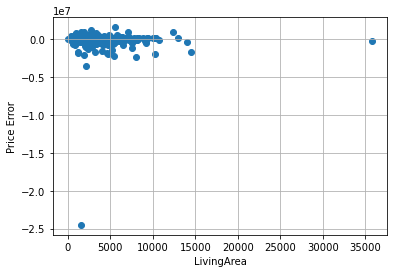

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(x=X['livingArea'], y=e)
plt.xlabel('LivingArea')
plt.ylabel('Price Error')
plt.grid('on')

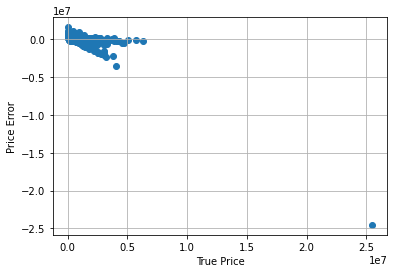

In [ ]:
from matplotlib import pyplot as plt
import seaborn
plt.scatter(x=y, y=e)
plt.xlabel('True Price')
plt.ylabel('Price Error')
plt.grid('on')

Outliers are distracting our model and causing us to underestimate home prices the more expensive they are.

<AxesSubplot:>

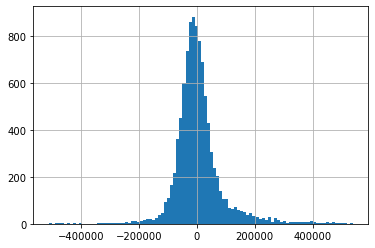

In [ ]:
e_all = e
e = e_all[(e < 2*rmse) & (e > -2 * rmse )]
plt.xlabel('Price Error')
plt.ylabel('Count of Homes')
e.hist(bins=100)

In [ ]:
df_features = df[feature_colnames].fillna(0).copy()
df_features = pd.concat([df_features, df_feature_isna], axis=1)
X = df_features
y = df[target]

model = LinearRegression()
model.fit(X=X, y=y)

y_pred = model.predict(X)
e = y_pred - y
rmse = np.sqrt(np.mean(e**2))

experiments.append(dict(
    fillna=0,
    model=model.__class__.__name__,
    numfeats=len(X.columns),
    rmse=rmse,
    ))
pd.DataFrame(experiments).sort_values("rmse").round()

fillna             model  numfeats      rmse isna_features
0   mean  LinearRegression        64  275377.0           NaN
1   mean  LinearRegression       124  274313.0          True
2      0  LinearRegression       124  275578.0           NaN
3      0  LinearRegression       124  275578.0           NaN

In [ ]:
experiments

[{'fillna': 'mean',
  'model': 'LinearRegression',
  'numfeats': 64,
  'rmse': 275377.0024181652},
 {'fillna': 'mean',
  'isna_features': True,
  'model': 'LinearRegression',
  'numfeats': 124,
  'rmse': 274313.2523525388},
 {'fillna': 0,
  'model': 'LinearRegression',
  'numfeats': 124,
  'rmse': 275578.16584448674},
 {'fillna': 0,
  'model': 'LinearRegression',
  'numfeats': 124,
  'rmse': 275578.16584448674},
 {'model': 'LinearRegression', 'numfeats': 124, 'rmse': 275578.16584448674}]

In [ ]:
df_experiments = pd.DataFrame(experiments)
df_experiments

fillna             model  numfeats           rmse isna_features
0   mean  LinearRegression        64  275377.002418           NaN
1   mean  LinearRegression       124  274313.252353          True
2      0  LinearRegression       124  275578.165844           NaN
3      0  LinearRegression       124  275578.165844           NaN
4    NaN  LinearRegression       124  275578.165844           NaN

Is RMSE the same as Standard Deviation of the Error (Standard Error)?

In [ ]:
pd.Series([rmse, e.std(), rmse - e.std()], index=' rmse, e.std(), rmse - e.std()'.split(',')).round()

 rmse              275578.0
 e.std()           275592.0
 rmse - e.std()       -14.0
dtype: float64

In [ ]:
X['livingArea_lt_20'] = x < 20
X

In [ ]:
model = LinearRegression()
model.fit(X=X, y=y)
y_pred = model.predict(X)
e = y_pred - y
rmse = np.sqrt(np.mean(e**2))
experiments.append(dict(
    model=model.__class__.__name__,
    numfeats=len(X.columns),
    rmse=rmse,
    ))
df_experiments = pd.DataFrame(experiments)
df_experiments

In [ ]:
model.coef_


In [ ]:
pd.Series(model.coef_, index=X.columns)